# Регрессия с 1 переменной 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'F:\Desktop\ml_pd\08-Linear-Regression-Models\Advertising.csv')

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df['total_spend'] = df['radio'] + df['TV'] + df['newspaper']

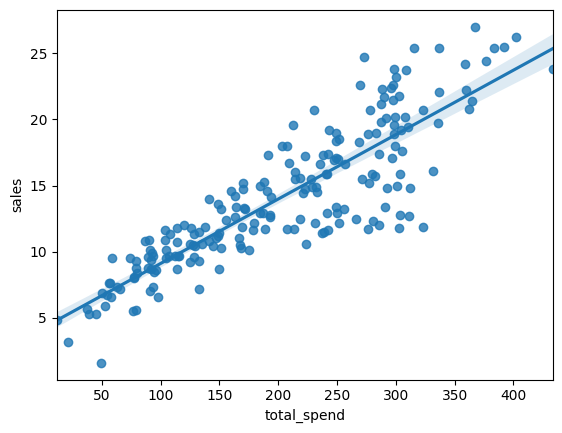

In [5]:
sns.regplot(data=df, x='total_spend', y='sales');

In [6]:
X = df['total_spend']
y = df['sales']

In [7]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [8]:
# y= m*x + b
# y = B1*x + B0
np.polyfit(X, y, deg=1) # B1, B0

array([0.04868788, 4.24302822])

In [9]:
potential_spend = np.linspace(0, 500, 100)

In [10]:
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [11]:
predicted_sales = 0.04868788 * potential_spend + 4.24302822

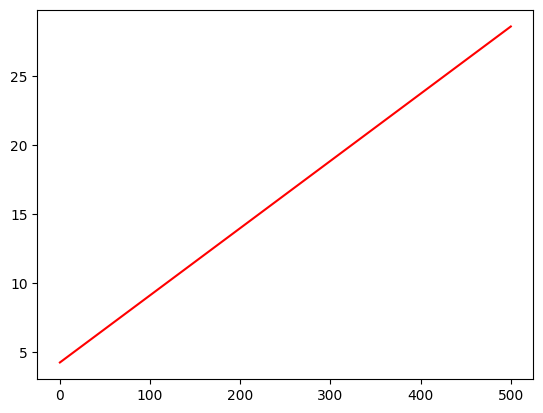

In [12]:
plt.plot(potential_spend, predicted_sales, color='r')

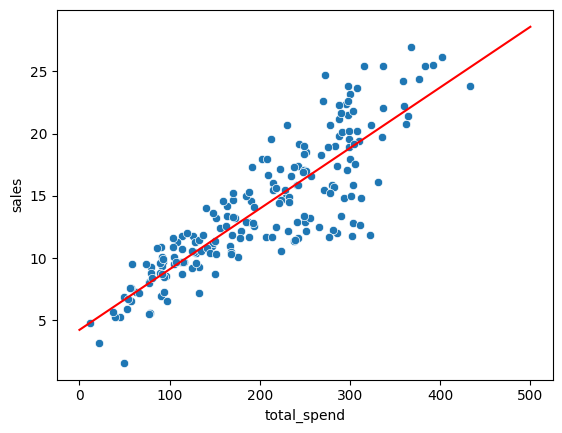

In [13]:
# наложим 2 графика: со всеми точками и предсказанный
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales, color='r')

In [14]:
# полиномиальная регрессия
# y = B3 * x^3 + B2 * x^2 + B1 * x + B0
np.polyfit(X, y, deg=3) # B3, B2, B1, B0

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [15]:
predicted_sales_2 = (3.07615033e-07 * potential_spend ** 3 +
                     -1.89392449e-04 * potential_spend ** 2 + 
                     8.20886302e-02 * potential_spend
                     + 2.70495053e+00)

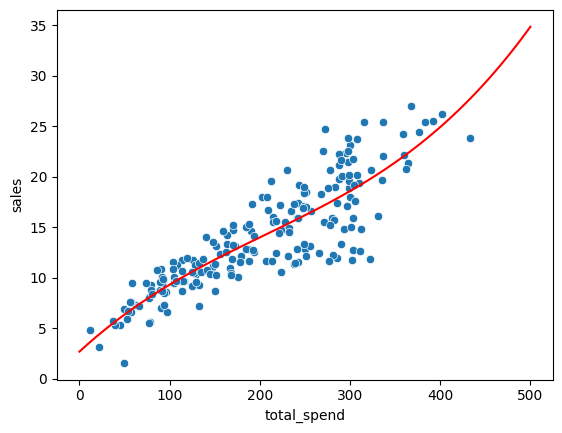

In [16]:
sns.scatterplot(data=df, x='total_spend', y='sales')
plt.plot(potential_spend, predicted_sales_2, color='r')

# Регрессия с несколькими переменными
Исслудуем связь между каждым каналом рекламы и продажами

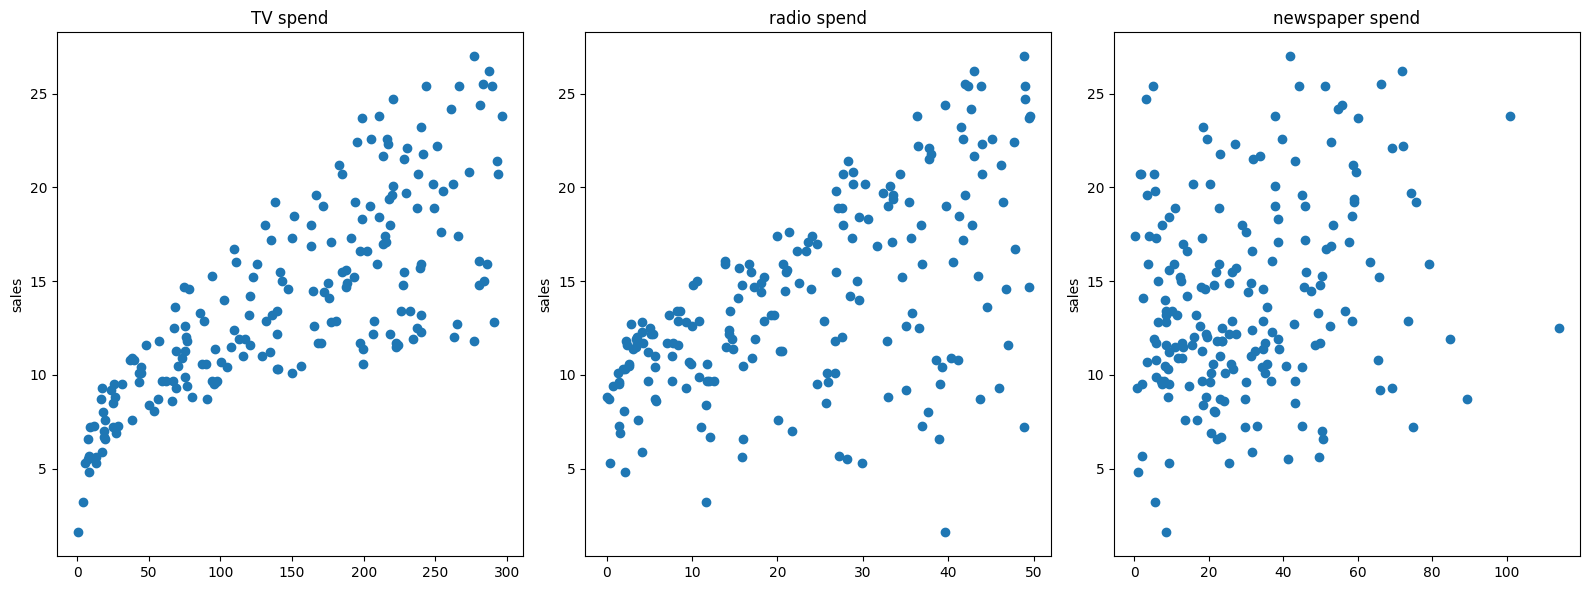

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel('sales')
axes[0].set_title('TV spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('sales')
axes[1].set_title('radio spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('sales')
axes[2].set_title('newspaper spend')

plt.tight_layout();

Для тв и радио видна линейная связь, тогда как по газетам нет

AttributeError: 'GrouperView' object has no attribute 'join'

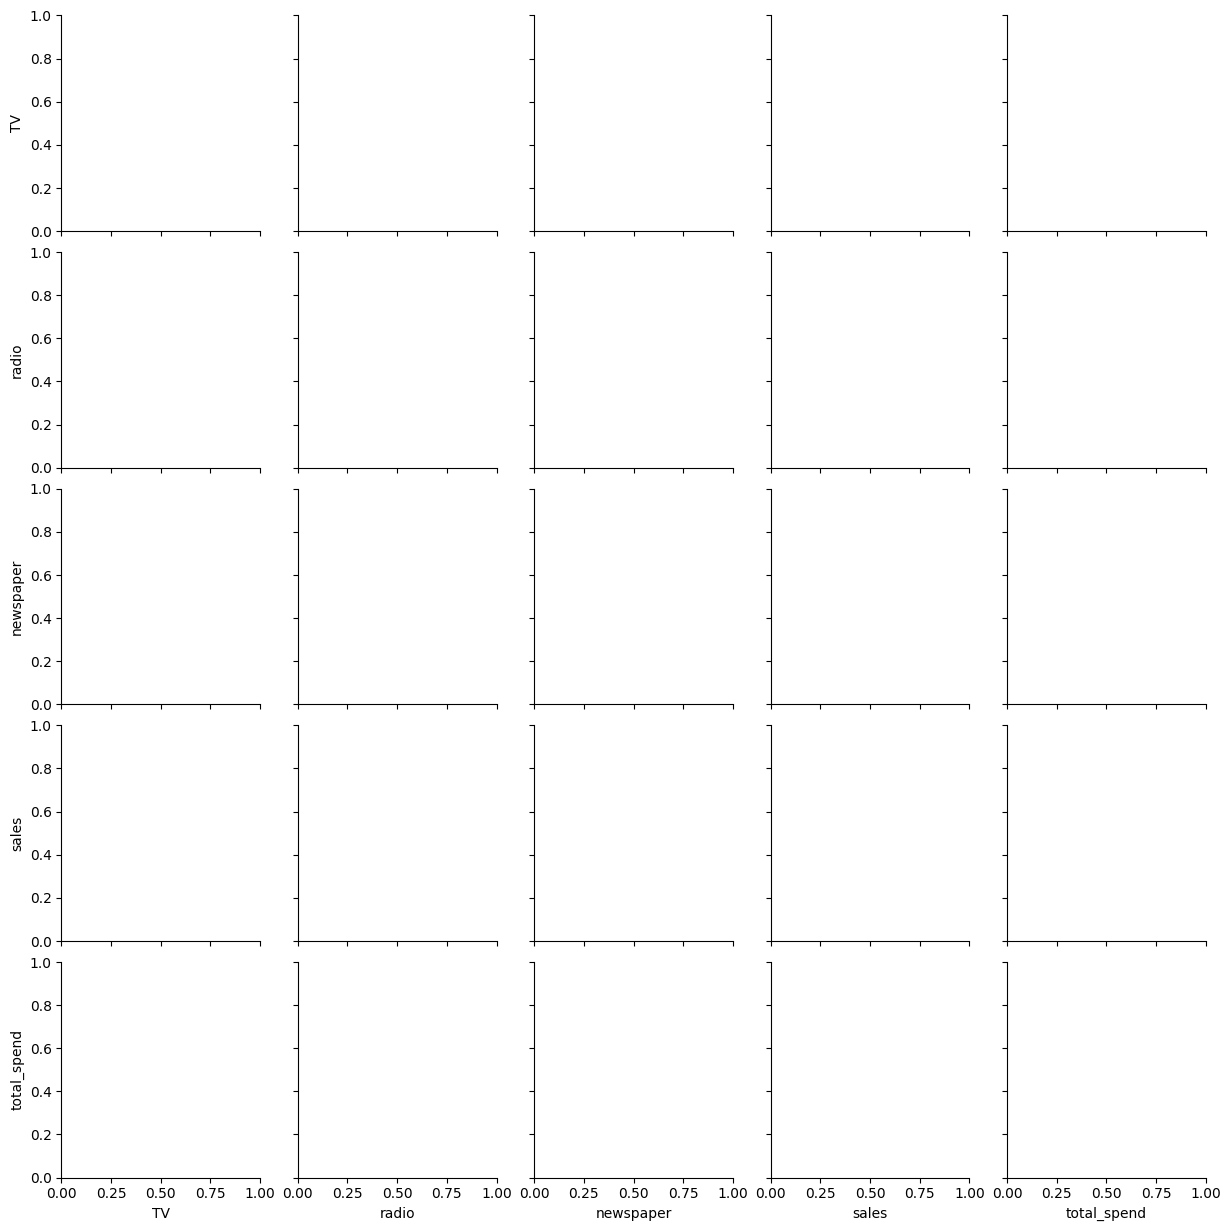

In [18]:
sns.pairplot(df)

In [ ]:
df[['TV', 'radio', 'newspaper', 'sales']]

In [19]:
pip list

Package                   Version
------------------------- --------------
anyio                     3.7.1
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asgiref                   3.6.0
asttokens                 2.4.1
async-generator           1.10
async-lru                 2.0.4
attrs                     24.1.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.4
catboost                  1.0.6
category-encoders         2.5.0
certifi                   2021.10.8
certipy                   0.1.3
cffi                      1.16.0
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.2.1
cryptography              43.0.0
cycler                    0.11.0
debugpy                   1.8.3
decorator                 5.1.1
defusedxml                0.7.1
distlib             

In [22]:
pip install matplotlib == 3.7.5

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\dimas\GitHub\repositories\start_ml\venv\Scripts\python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '==': Expected package name at the start of dependency specifier
    ==
    ^
